# TimML Notebook 1
## A well in uniform flow

Consider a well in the middle aquifer of a three aquifer system. Aquifer properties are given in Table 1. The well is located at $(x,y)=(0,0)$, the discharge is $Q=10,000$ m$^3$/d and the radius is 0.2 m. There is a uniform flow from West to East with a gradient of 0.002. The head is fixed to 20 m at a distance of 10,000 m downstream of the well. Here is the cookbook recipe to build this model:
    
* Import pylab to use numpy and plotting: `from pylab import *`
* Set figures to be in the notebook with `%matplotlib notebook`
* Import everything from TimML: `from timml import *`
* Create the model and give it a name, for example `ml` with the command `ml = ModelMaq(kaq, z, c)` (substitute the correct lists for `kaq`, `z`, and `c`).
* Enter the well with the command `w = Well(ml, xw, yw, Qw, rw, layers)`, where the well is called `w`.
* Enter uniform flow with the command `Uflow(ml, slope, angle)`.
* Enter the reference head with `Constant(ml, xr, yr, head, layer)`.
* Solve the model `ml.solve()`

#### Table 1: Aquifer data for exercise 1
|Layer        |$k$ (m/d)|$z_b$ (m)|$z_t$|$c$ (days)|
|-------------|--------:|--------:|----:|---------:|
|Aquifer 0    |    10   |   -20   |  0  |    -     |
|Leaky Layer 1|     -   |   -40   | -20 |  4000    |   
|Aquifer 1    |    20   |   -80   | -40 |    -     |
|Leaky Layer 2|     -   |   -90   | -80 |  10000   | 
|Aquifer 2    |     5   |   -140  | -90 |    -     ||


In [1]:
%matplotlib inline
from pylab import *
from timml import *
figsize=(8, 8)

In [2]:
ml = ModelMaq(kaq=[10, 20, 5],
              z=[0, -20, -40, -80, -90, -140], 
              c=[4000, 10000])
w = Well(ml, xw=0, yw=0, Qw=10000, rw=0.2, layers=1)
Constant(ml, xr=10000, yr=0, hr=20, layer=0)
Uflow(ml, slope=0.002, angle=0)
ml.solve()

Number of elements, Number of equations: 3 , 1
...
solution complete


### Questions:
#### Exercise 1a
What are the leakage factors of the aquifer system?

In [3]:
print('The leakage factors of the aquifers are:')
print(ml.aq.lab)

The leakage factors of the aquifers are:
[   0.         1430.58042146  790.84743012]


#### Exercise 1b
What is the head at the well?

In [4]:
print('The head at the well is:')
print(w.headinside())

The head at the well is:
[20.06196743]


#### Exercise 1c
Create a contour plot of the head in the three aquifers. Use a window with lower left hand corner $(x,y)=(−3000,−3000)$ and upper right hand corner $(x,y)=(3000,3000)$. Notice that the heads in the three aquifers are almost equal at three times the largest leakage factor.

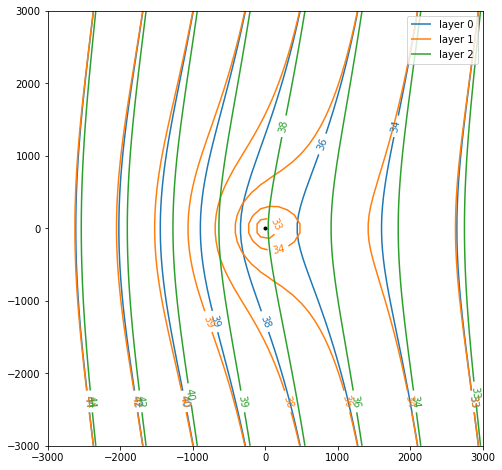

In [5]:
ml.contour(win=[-3000, 3000, -3000, 3000], ngr=50, layers=[0, 1, 2], levels=10, 
           legend=True, figsize=figsize)

#### Exercise 1d
Create a contour plot of the head in aquifer 1 with labels along the contours. Labels are added when the `labels` keyword argument is set to `True`. The number of decimal places can be set with the `decimals` keyword argument, which is zero by default.

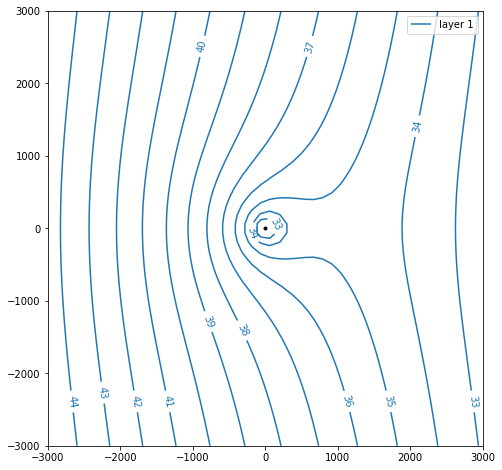

In [6]:
ml.contour(win=[-3000, 3000, -3000, 3000], ngr=50, layers=[1], levels=np.arange(30, 45, 1), 
           labels=True, legend=['layer 1'], figsize=figsize)

#### Exercise 1e
Create a contour plot with a vertical cross-section below it. Start three pathlines from $(x,y)=(-2000,-1000)$ at levels $z=-120$, $z=-60$, and $z=-10$. Try a few other starting locations.

...
...


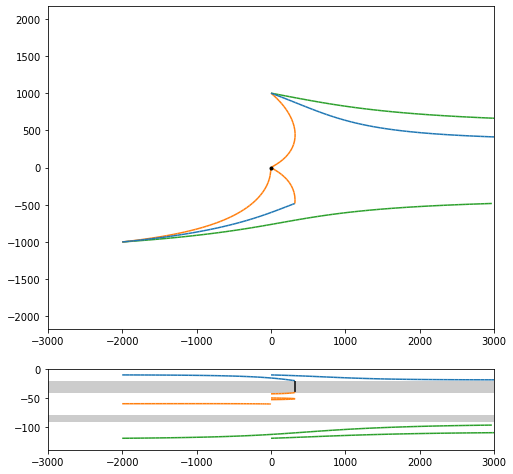

In [7]:
win=[-3000, 3000, -3000, 3000]
ml.plot(win=win, orientation='both', figsize=figsize)
ml.tracelines(-2000 * ones(3), -1000 * ones(3), [-120, -60, -10], hstepmax=50, 
              win=win, orientation='both')
ml.tracelines(0 * ones(3), 1000 * ones(3), [-120, -50, -10], hstepmax=50, 
              win=win, orientation='both')

#### Exercise 1f
Add an abandoned well that is screened in both aquifer 0 and aquifer 1, located at $(x, y) = (100, 100)$ and create contour plot of all aquifers near the well (from (-200,-200) till (200,200)). What are the discharge and the head at the abandoned well? Note that you have to solve the model again!

Number of elements, Number of equations: 4 , 3
....
solution complete


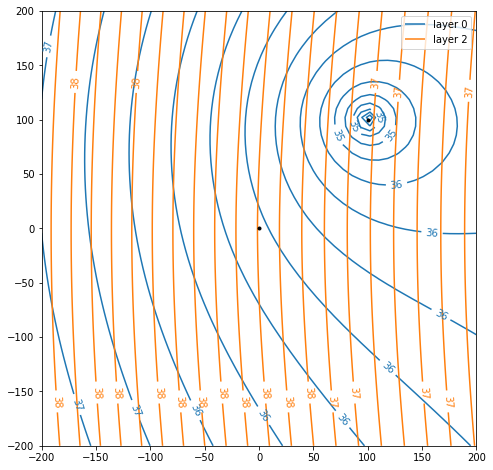

In [8]:
ml = ModelMaq(kaq=[10, 20, 5],
              z=[0, -20, -40, -80, -90, -140], 
              c=[4000, 10000])
w = Well(ml, xw=0, yw=0, Qw=10000, rw=0.2, layers=1)
Constant(ml, xr=10000, yr=0, hr=20, layer=0)
Uflow(ml, slope=0.002, angle=0)
wabandoned = Well(ml, xw=100, yw=100, Qw=0, rw=0.2, layers=[0, 1])
ml.solve()
ml.contour(win=[-200, 200, -200, 200], ngr=50, layers=[0, 2], 
           levels=20, color=['C0', 'C1', 'C2'], legend=True, figsize=figsize)

In [9]:
print('The head at the abandoned well is:')
print(wabandoned.headinside())
print('The discharge at the abandoned well is:')
print(wabandoned.discharge())

The head at the abandoned well is:
[33.62101294 33.62101294]
The discharge at the abandoned well is:
[ 431.40914098 -431.40914098    0.        ]
